# Banana-navigation

Credits to Udacity team for coming up with this Unity environment and this cool assignment!

In [1]:
from train import train
from src.agent import DqnAgent, Duel_Network
from unityagents import UnityEnvironment
import numpy as np

Refer to `README.md` for the full scope of this project. To start off, lets load our environment...

In [2]:
env = UnityEnvironment(file_name="./data/unity-banana-env/linux/Banana.x86_64", 
                       worker_id=2, 
                       base_port=8089, 
                       no_graphics=True)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### The DQNAgent

The DQNAgent class is our implementation of the agent. The class consists of a neural network that can be _designed_ using `hidden_sizes`. It uses an Adam optimizer with default learning rate of _5e-4_. 

Learning takes place for every 3 steps across episodes by default but this can be changed using the `learn_every` hyperparameter. Likewise, since this is a fixed-target implementation, transfer of weights from local to target network happens every 5 steps across episodes but can be changed using the `transfer_every` hyperparameter.

More importantly we can toggle this class to use the Double DQN implementation by either setting the `double_dqn` hyperparameter to _True_ or _False_

### Taking on a challenge
So the challenge given by Udacity is to train the agent such that it can be solved in less than 1800 episodes where `solved` is defined as an average score of `13`. Let's see if we can do it with the default dqn agent using the DQNAgent class. 


In [4]:
# default dqn agent
agent = DqnAgent(double_dqn=False, learn_every=3, transfer_every=7)

dqn_scores = train(agent, env, brain_name, n_episodes=1800, score_to_stop=13.0, 
                   destn_path="./data/network-weights/dqn-default.pth")

Episode 100	Average Score: 0.19
Episode 200	Average Score: 0.99
Episode 300	Average Score: 3.44
Episode 400	Average Score: 4.38
Episode 500	Average Score: 6.97
Episode 600	Average Score: 7.81
Episode 700	Average Score: 7.99
Episode 800	Average Score: 9.13
Episode 900	Average Score: 9.152
Episode 1000	Average Score: 11.17
Episode 1032	Average Score: 13.00
Environment solved in 1032 episodes!	Average Score: 13.00


Double dqn algorithm is often touted to have more stable and supposedly faster learning. Let's check it out to see if its true.

In [5]:
# double dqn agent
agent = DqnAgent(double_dqn=True, learn_every=3, transfer_every=7)

doubldqn_scores = train(agent, env, brain_name, n_episodes=180000, score_to_stop=13.0, 
                        destn_path="./data/network-weights/doubledqn-default.pth")

Episode 100	Average Score: 0.18
Episode 200	Average Score: 0.83
Episode 300	Average Score: 1.76
Episode 400	Average Score: 3.33
Episode 500	Average Score: 4.27
Episode 600	Average Score: 4.48
Episode 700	Average Score: 6.84
Episode 800	Average Score: 7.82
Episode 900	Average Score: 8.89
Episode 1000	Average Score: 9.05
Episode 1100	Average Score: 10.52
Episode 1200	Average Score: 12.12
Episode 1281	Average Score: 13.00
Environment solved in 1281 episodes!	Average Score: 13.00


### Let's visualize and compare our performance across episodes

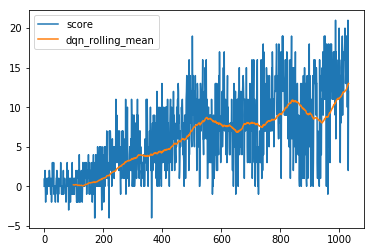

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

dqnscores_df = pd.DataFrame(dqn_scores, columns=["score"])
dqnscores_df['dqn_rolling_mean'] = dqnscores_df.score.rolling(100).mean()
_ = dqnscores_df.plot()

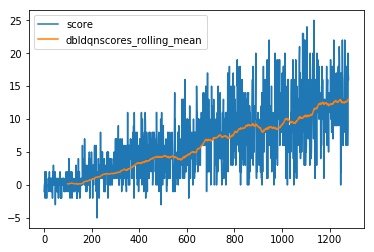

In [9]:
dbldqnscores_df = pd.DataFrame(doubldqn_scores, columns=["score"])
dbldqnscores_df['dbldqnscores_rolling_mean'] = dbldqnscores_df.score.rolling(100).mean()
_ = dbldqnscores_df.plot()

### Observations
1. From the trend of the rolling means, a normal **fixed-target dqn displays more erratic learning compared to double dqn**. This is expected given that target action values are noisy for sparsely visited states and yet used to choose the best action. Double dqn on the other hand uses best actions chosen from the local network and let the target network score on that best action.

2. **However, fixed-target dqn seems to reach our desired score of 13 faster than our double dqn**. Due to its more erratic learning behaviour though, its not clear yet if this achievement in speed is based on chance or is 'truly learned' - this score may dip if we let the agent play more subsequent episodes. 

### Future Work

_According to level of difficulty (top being least difficult)_
* Implement dueling DQN
* Implement Prioritized Experience Replay
* Implementation of PPO/A2C/A3C
* Will probably want to re-do this using pixels instead
